# Braintracer Analysis
Braintracer extends the functionality of cellfinder and brainreg. It takes the downsampled data, registered atlas, and positive cell coordinates, scales them down to downsampled space and assigns them to corresponding atlas brain areas, cleanly displaying the results from multiple datasets.

In [1]:
import braintracer.file_management as btf
import braintracer.analysis as bt
import braintracer.plotting as btp
import matplotlib.pyplot as plt

allen mouse atlas (res. 10um)
From: http://www.brain-map.org (Wang et al 2020, https://doi.org/10.1016/j.cell.2020.04.007 )


In [2]:
bt.debug = False # False by default
bt.grouped = True # True by default, set to False if you only have one group
bt.starter_region = 'IO' # You must set a starter region to use some features

In [3]:
bt.Dataset('FR190', 'LS', 'r', 'g');
bt.Dataset('FR195', 'LS', 'r', 'g');
bt.Dataset('FR197', 'LV', 'r', 'g', modify_starter=True);
bt.Dataset('FR198', 'LS', 'r', 'g');
bt.Dataset('FR199', 'LV', 'r', 'g');
bt.Dataset('FR200', 'LS', 'r', 'g');
title = '_'.join([i.name for i in bt.datasets])

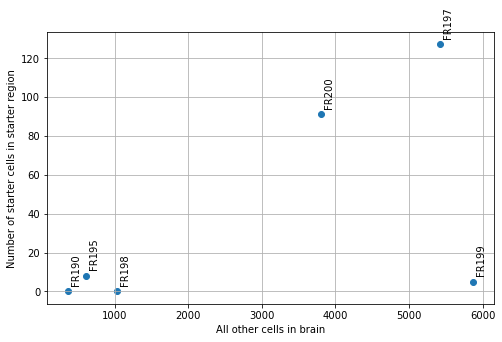

In [5]:
btp.generate_starter_cell_scatter(xy_tol_um=100, z_tol_um=100)
btf.save('starter_vs_all_cells', as_type='png')

View results in braintracer/TRIO.


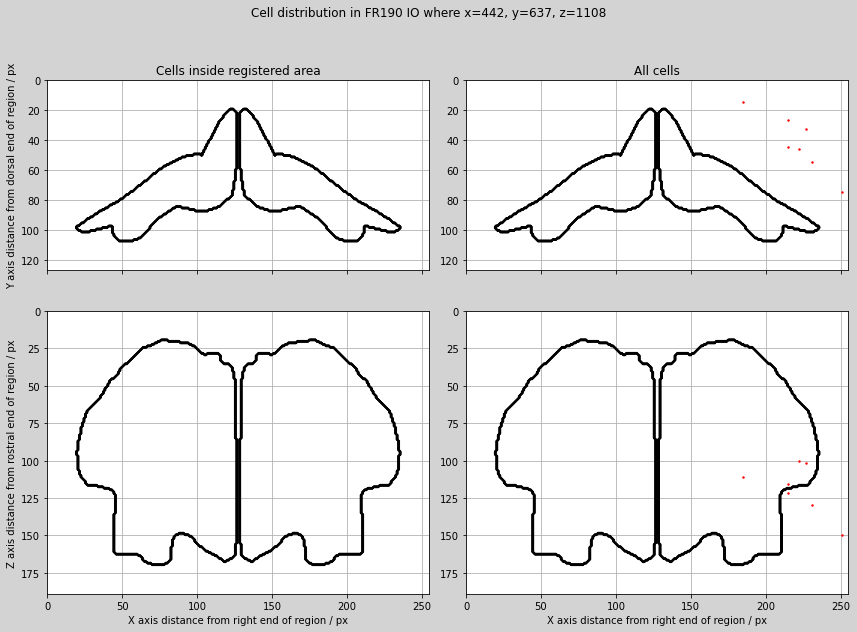

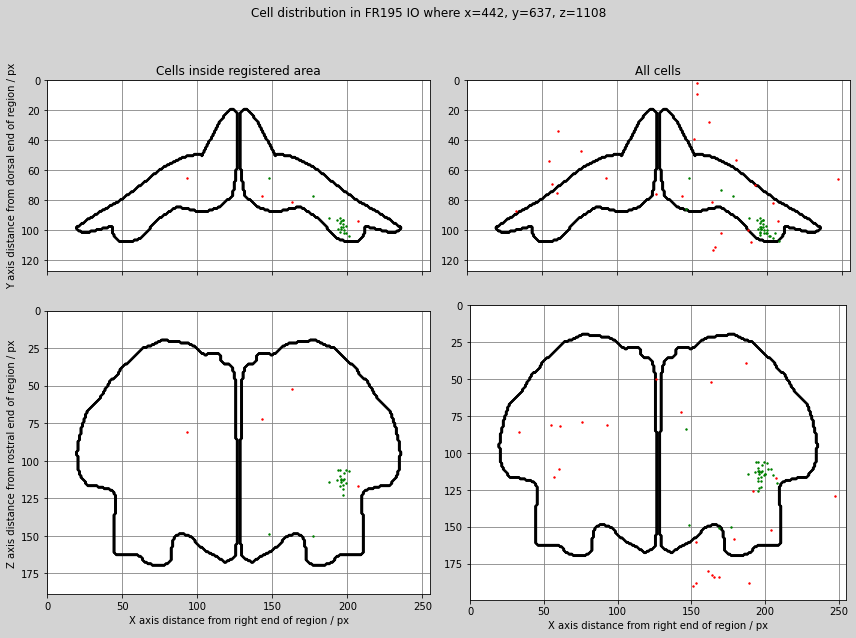

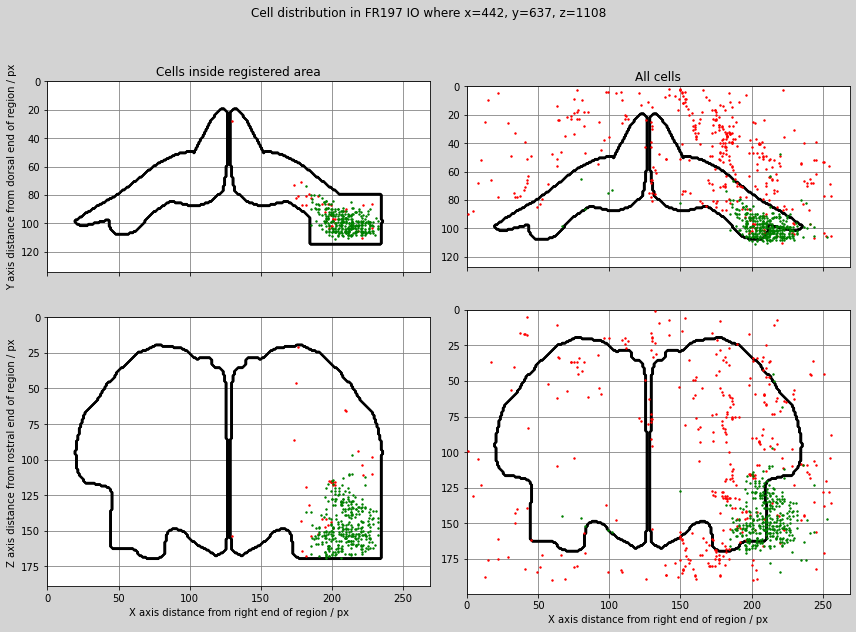

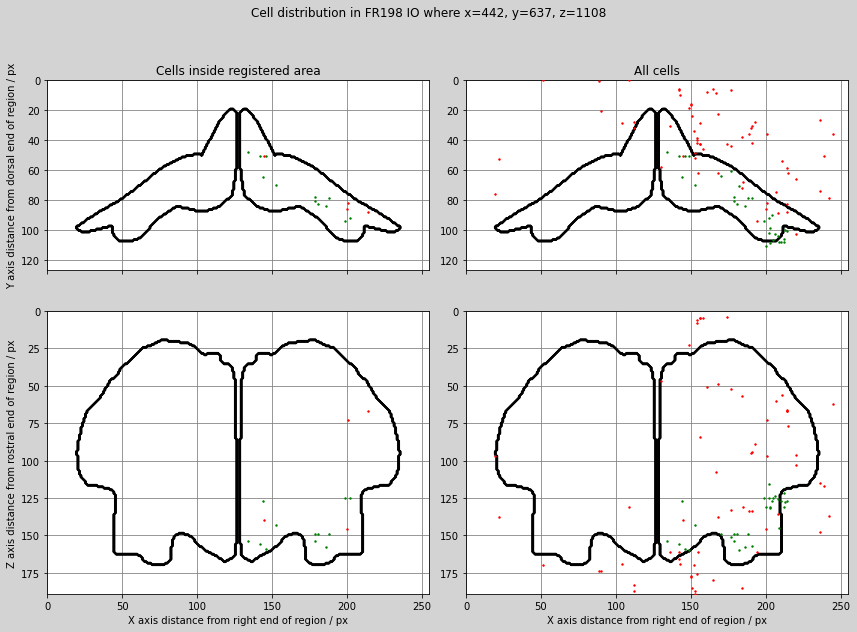

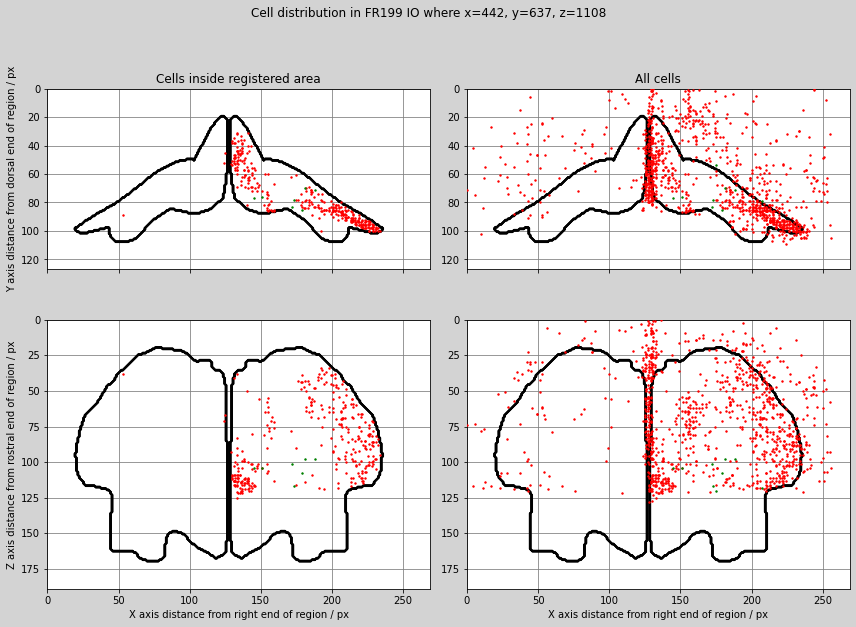

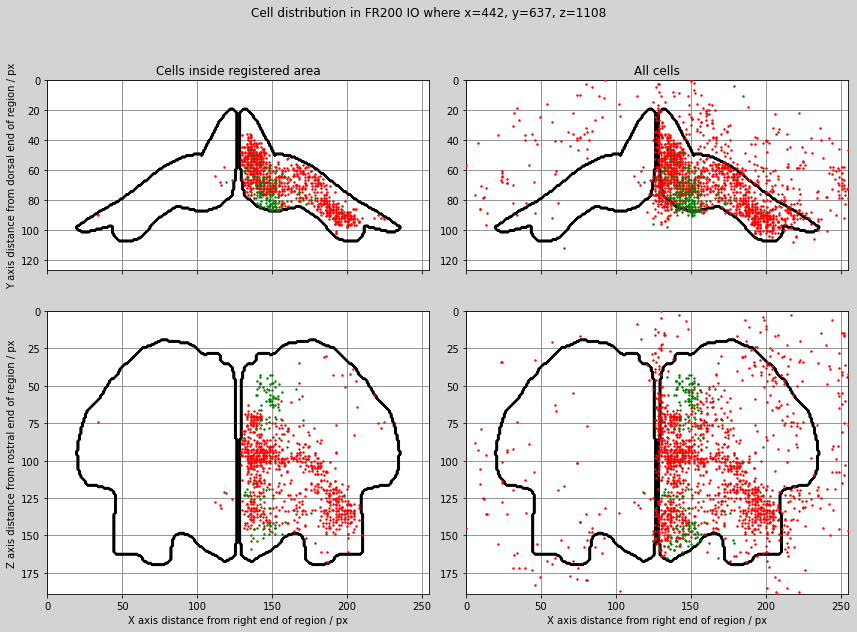

In [6]:
btp._generate_starter_validation_plot(padding=20)

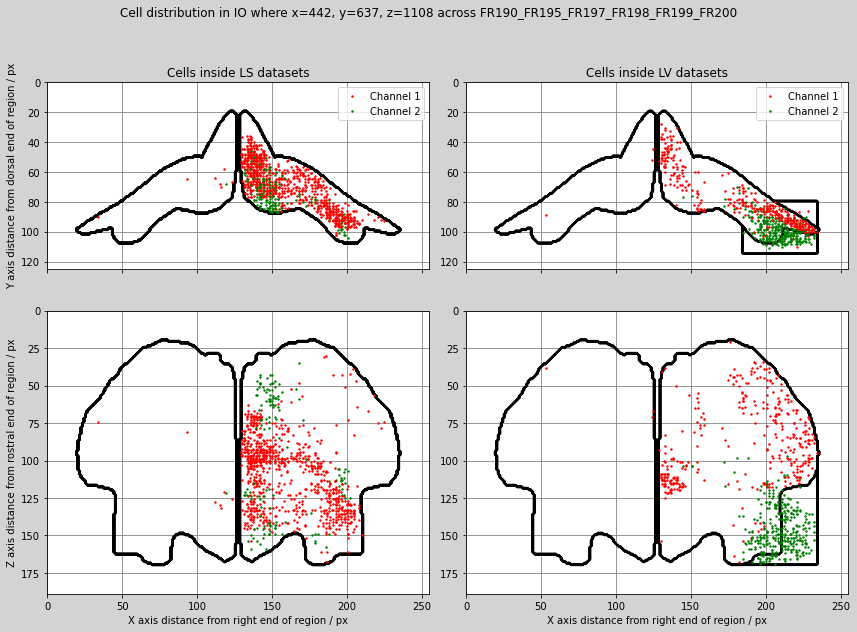

In [7]:
btp.generate_projection_plot('IO', include_surrounding=False, padding=20)
btf.save(f'IO_{title}_comparison', as_type='png')

In [8]:
bt.datasets[0].adapt_starter_area((452+175, 452+225), (627+90, 627+125), (1098+100, 1098+180))

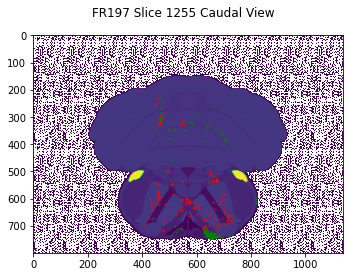

In [4]:
bt.datasets[2].show_coronal_section((0, 2776), cells_pm=10, ch1=None)
#btf.save(f'{title}_inj_section_g', as_type='png')

In [5]:
#bt.datasets[0].num_cells(ch1=False)

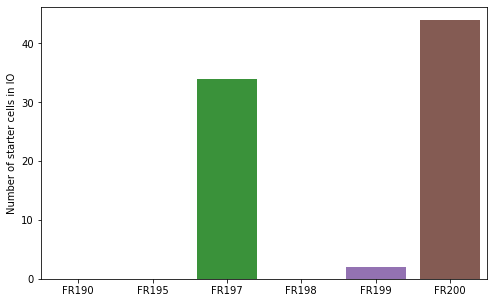

In [6]:
btp.generate_starter_cell_plot(xy_tol_um=40, z_tol_um=40)

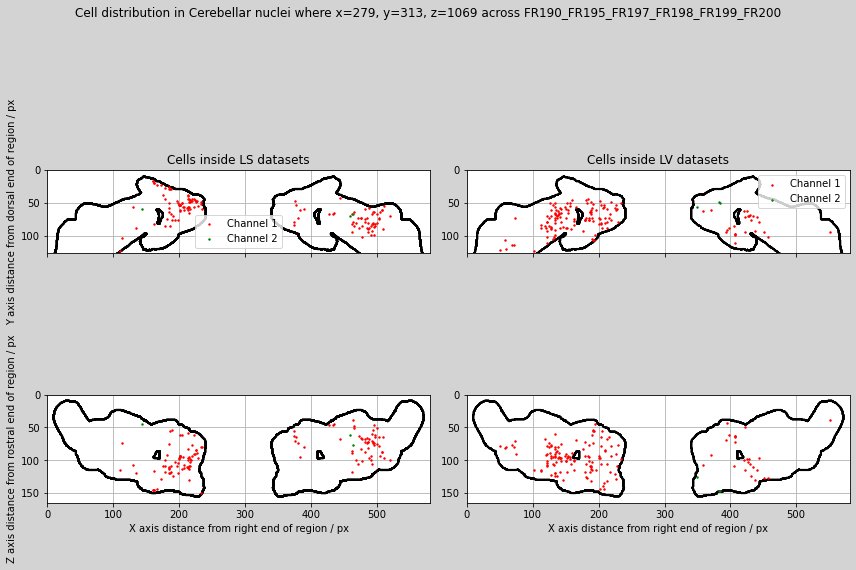

In [7]:
btp.generate_projection_plot('Cerebellar nuclei')
#btf.save(f'CbN_{title}', as_type='pdf')

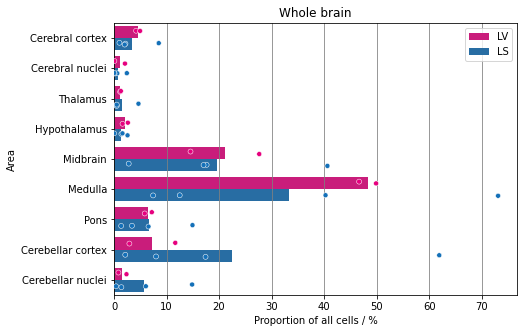

In [8]:
btp.generate_summary_plot()
#btf.save(f'summary_{title}', as_type='pdf')

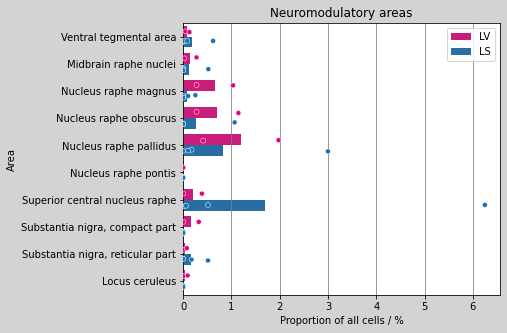

In [9]:
mod_areas = ['VTA','RAmb', 'RM', 'RO', 'RPA', 'RPO', 'CS', 'SNc', 'SNr', 'LC']
btp.generate_custom_plot(mod_areas, title='Neuromodulatory areas')
#btf.save(f'neuromodulation_{title}', as_type='pdf')

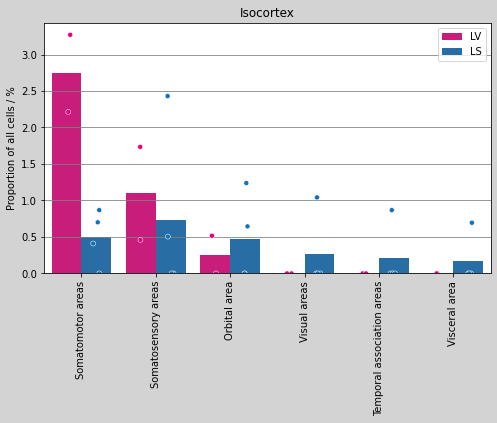

In [10]:
btp.generate_zoom_plot('Isocortex', depth=1, threshold=0.1)
#btf.save(f'isocortex_zoom_{title}', as_type='pdf')

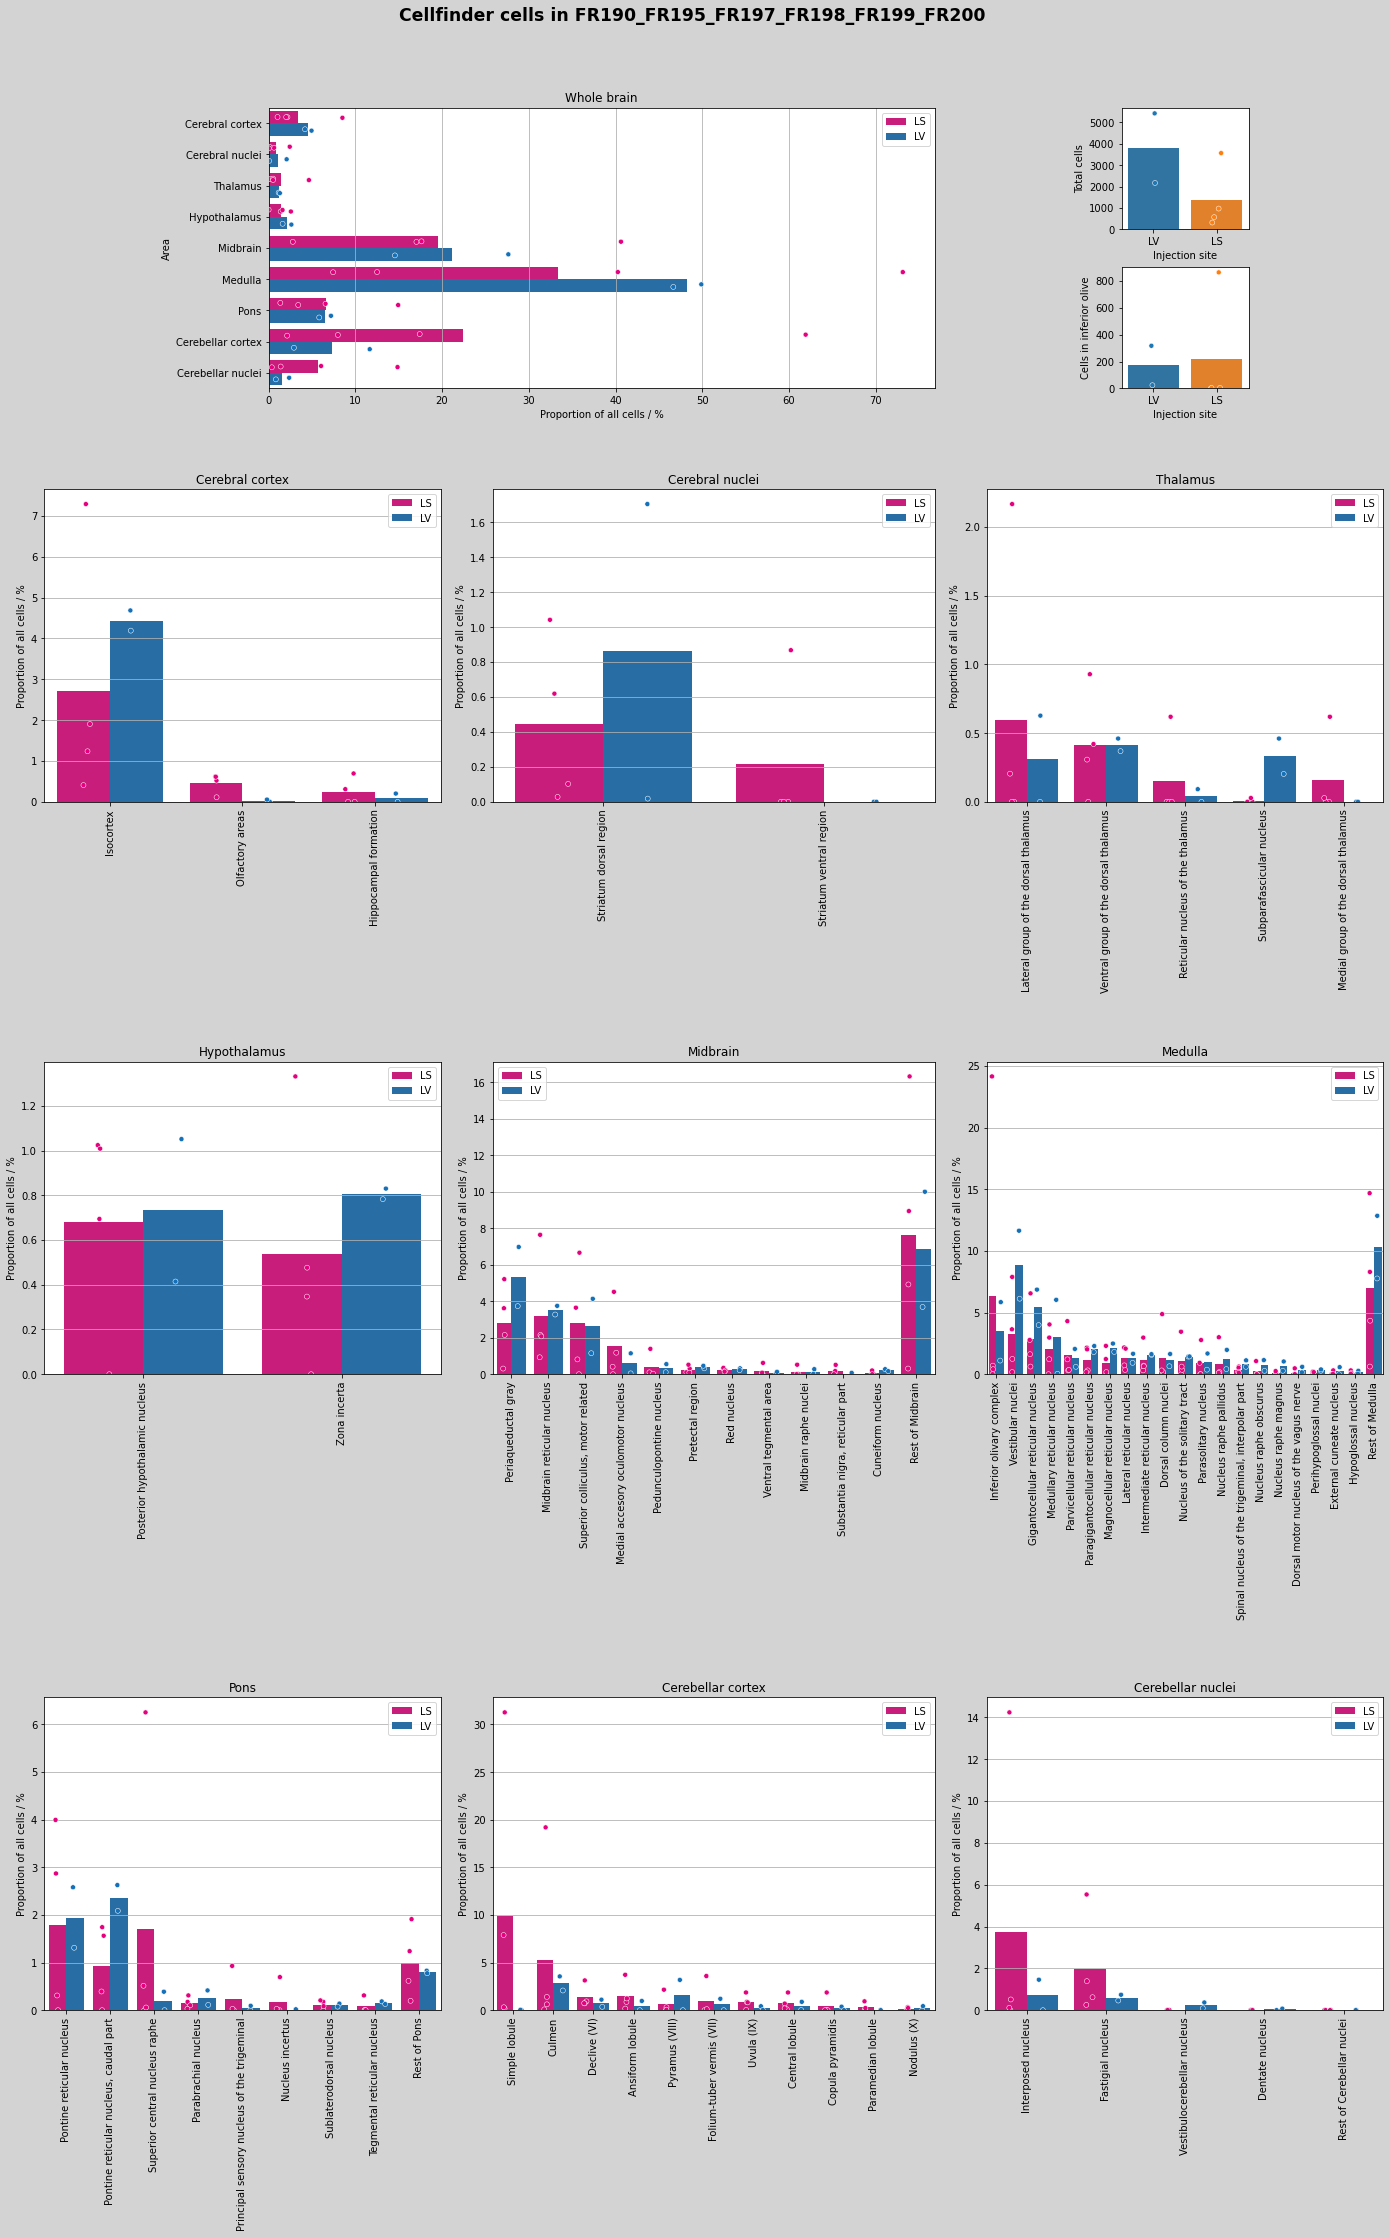

In [4]:
btp.generate_mega_overview_figure(f'Cellfinder cells in {title}')
#btf.save(f'areas_overview_{title}_ungrouped', as_type='pdf')